In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

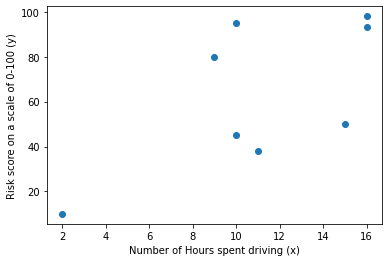

In [7]:
X_driving_hours = [10, 9, 2, 15, 10, 16, 11, 16]
y_risk_score = [95, 80, 10, 50, 45, 98, 38, 93]

plt.plot(X_driving_hours, y_risk_score, "o")
plt.xlabel("Number of Hours spent driving (x)")
plt.ylabel("Risk score on a scale of 0-100 (y)")

plt.show()

In [8]:
def mean(values):
    return sum(values)/float(len(values))

In [9]:
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

In [10]:
def covariance(x, x_mean, y, y_mean):
    cv = 0.0
    
    for i in range(len(x)):
        cv += (x[i] - x_mean) * (y[i] - y_mean)
        
    return cv

In [16]:
def find_coefficients(x, y):
    x_mean = mean(x)
    y_mean = mean(y)
    
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    
    return [b0, b1]

In [23]:
b0, b1 = find_coefficients(X_driving_hours, y_risk_score)
print("Coefficents are :\nB0 = %.3f \nB1 = %.3f" % (b0, b1))

Coefficents are :
B0 = 12.585 
B1 = 4.588


In [27]:
print("The equation of the best fit line (y = b0 + b1x) is : y = %.3f + %.3fx" %(b0, b1))

The equation of the best fit line (y = b0 + b1x) is : y = 12.585 + 4.588x


In [29]:
# Checking if coefficients are correct or not

from sklearn.linear_model import LinearRegression

X = np.array(X_driving_hours).reshape(-1, 1)
y = np.array(y_risk_score).reshape(-1, 1)

lr = LinearRegression().fit(X, y)

In [30]:
lr.coef_

array([[4.58789861]])

In [31]:
lr.intercept_

array([12.58462796])

In [43]:
def abline(intercept, slope):
    axes = plt.gca()
    xvals = np.array(axes.get_xlim())
    yvals = intercept + slope * xvals
    
    plt.plot(xvals, yvals, "--")

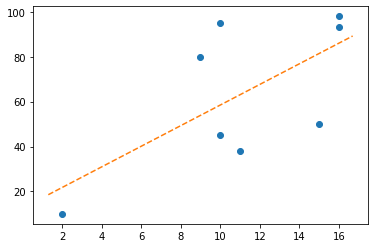

In [44]:
plt.plot(X_driving_hours, y_risk_score, "o")
abline(b0, b1)

In [50]:
# Prediction

def linear_regression(X_train, y_train, X_test):
    predictions = list()
    
    b0, b1 = find_coefficients(X_train, y_train)
    
    for row in X_test:
        y_pred = b0 + b1 * row
        predictions.append(y_pred)
        
    return predictions

In [52]:
n = int(input("Enter the number of predictions required: "))

res = []

for i in range(n):
    ele = int(input())
    res.append(ele)
    
predictions = linear_regression(X_driving_hours, y_risk_score, res)

predictions

Enter the number of predictions required: 3
3
7
14


[26.348323793949305, 44.699918233851186, 76.81520850367949]

In [63]:
# Calculate RMSE

from math import sqrt

def calc_rmse(actual, prediction):
    sum_err = 0.0
    
    for i in range(len(actual)):
        pred_err = prediction[i] - actual[i]
        sum_err += (pred_err ** 2)
    
    mean_err = sum_err / float(len(actual))
        
    return sqrt(mean_err)

In [77]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_driving_hours, y_risk_score, test_size= 1/3, random_state=0)

pred = linear_regression(X_train, y_train, X_test)
rmse = calc_rmse(y_test, pred)

print("Root Mean Squared Error (RMSE): ", rmse)

Root Mean Squared Error (RMSE):  29.547856861944695


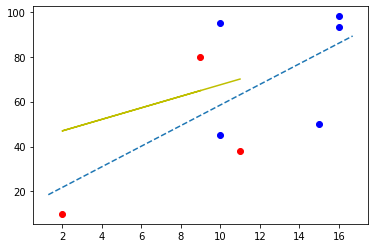

In [78]:
plt.plot(X_train, y_train, "bo")
plt.plot(X_test, y_test, "ro")
plt.plot(X_test, pred, "y")

plt.plot()

abline(b0, b1)
plt.show()